In [69]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to build the models
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [70]:
X_train = pd.read_csv('/Users/patrycjapiechowicz/CYBER/xtrain.csv')
X_test = pd.read_csv('/Users/patrycjapiechowicz/CYBER/xtest.csv')

In [71]:
y_train = X_train['label'].values.reshape(-1,1)
y_test = X_test['label'].values.reshape(-1,1)

In [72]:
X_train = X_train.drop('label',axis=1)
X_test =X_test.drop('label',axis=1)

In [73]:
y_train.shape,y_test.shape, X_train.shape, X_test.shape

((18000, 1), (2000, 1), (18000, 180), (2000, 180))

#### PCA

In [74]:
from sklearn.decomposition import PCA

In [165]:
pca = PCA(n_components=50)

In [166]:
pca.fit(X_train)

PCA(n_components=50)

In [167]:
x_pca = pca.transform(X_train)

In [168]:
X_train.shape

(18000, 180)

In [169]:
x_pca.shape

(18000, 50)

In [170]:
x_pca_test = pca.transform(X_test)

In [171]:
x_pca_test.shape

(2000, 50)

#### Interpreting the components
Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [172]:
pca.components_

array([[ 8.55625503e-02,  2.25361785e-02,  2.38315555e-02, ...,
         5.98351603e-02, -7.83152572e-05, -7.83152572e-05],
       [-1.57356397e-01,  6.02970242e-03, -2.56118596e-03, ...,
         1.60156942e-01, -9.32650238e-05, -9.32650238e-05],
       [ 1.78839176e-01,  4.01997855e-02, -9.56895899e-03, ...,
        -2.37462610e-01, -2.50151443e-05, -2.50151443e-05],
       ...,
       [-3.11114026e-02, -3.00203555e-02, -9.24697146e-02, ...,
        -1.07512892e-02, -7.34644111e-04, -7.34644111e-04],
       [-2.25676799e-02,  2.93978287e-02,  1.11199746e-02, ...,
         2.12495096e-02, -4.03948332e-04, -4.03948332e-04],
       [-3.71711147e-02, -1.56095117e-01, -7.06723072e-02, ...,
         4.39997924e-03,  9.60452548e-04,  9.60452548e-04]])

In [173]:
df_comp = pd.DataFrame(pca.components_,columns=X_train.columns)

In [174]:
df_comp

,section_has_non_standard_entry,section_cnt,section_high_entropy_cnt,section_high_entropy_ratio,section_entropy_max,section_has_non_standard_sections_ratio,header_coff_characteristics_chara_32bit_machine,header_coff_characteristics_relocs_stripped,header_coff_characteristics_line_nums_stripped,header_coff_characteristics_local_syms_stripped,header_coff_timestamp,header_coff_machine,header_optional_subsystem,header_optional_magic,header_optional_major_image_version,header_optional_minor_image_version,header_optional_major_linker_version,header_optional_minor_linker_version,header_optional_major_operating_system_version,header_optional_minor_operating_system_version,header_optional_major_subsystem_version,header_optional_minor_subsystem_version,header_optional_sizeof_code,header_optional_sizeof_headers,header_optional_sizeof_heap_commit,header_coff_characteristics_bytes_reversed_lo,header_coff_characteristics_bytes_reversed_hi,header_optional_dll_characteristics_terminal_server_aware,header_optional_dll_characteristics_dynamic_base,header_optional_dll_characteristics_nx_compat,header_coff_characteristics_large_address_aware,header_optional_dll_characteristics_no_seh,header_coff_characteristics_dll,header_coff_characteristics_debug_stripped,header_optional_dll_characteristics_high_entropy_va,header_optional_dll_characteristics_guard_cf,header_optional_dll_characteristics_no_bind,header_coff_characteristics_removable_run_from_swap,header_coff_characteristics_net_run_from_swap,header_coff_characteristics_aggressive_ws_trim,header_optional_dll_characteristics_force_integrity,header_optional_dll_characteristics_appcontainer,header_optional_dll_characteristics_no_isolation,header_coff_characteristics_system,header_optional_dll_characteristics_wdm_driver,strings_printabledist_0,strings_printabledist_1,strings_printabledist_2,strings_printabledist_3,strings_printabledist_4,strings_printabledist_5,strings_printabledist_6,strings_printabledist_7,strings_printabledist_8,strings_printabledist_9,strings_printabledist_10,strings_printabledist_11,strings_printabledist_12,strings_printabledist_13,strings_printabledist_14,strings_printabledist_15,strings_printabledist_16,strings_printabledist_17,strings_printabledist_18,strings_printabledist_19,strings_printabledist_20,strings_printabledist_21,strings_printabledist_22,strings_printabledist_23,strings_printabledist_24,strings_printabledist_25,strings_printabledist_26,strings_printabledist_27,strings_printabledist_28,strings_printabledist_29,strings_printabledist_30,strings_printabledist_31,strings_printabledist_32,strings_printabledist_33,strings_printabledist_34,strings_printabledist_35,strings_printabledist_36,strings_printabledist_37,strings_printabledist_38,strings_printabledist_39,strings_printabledist_40,strings_printabledist_41,strings_printabledist_42,strings_printabledist_43,strings_printabledist_44,strings_printabledist_45,strings_printabledist_46,strings_printabledist_47,strings_printabledist_48,strings_printabledist_49,strings_printabledist_50,strings_printabledist_51,strings_printabledist_52,strings_printabledist_53,strings_printabledist_54,strings_printabledist_55,strings_printabledist_56,strings_printabledist_57,strings_printabledist_58,strings_printabledist_59,strings_printabledist_60,strings_printabledist_61,strings_printabledist_62,strings_printabledist_63,strings_printabledist_64,strings_printabledist_65,strings_printabledist_66,strings_printabledist_67,strings_printabledist_68,strings_printabledist_69,strings_printabledist_70,strings_printabledist_71,strings_printabledist_72,strings_printabledist_73,strings_printabledist_74,strings_printabledist_75,strings_printabledist_76,strings_printabledist_77,strings_printabledist_78,strings_printabledist_79,strings_printabledist_80,strings_printabledist_81,strings_printabledist_82,strings_printabledist_83,strings_printabledist_84,strings_printabledist_85,strings_printabledist_86,strings_printabledist_87,strings_printabledist_88,strings_p

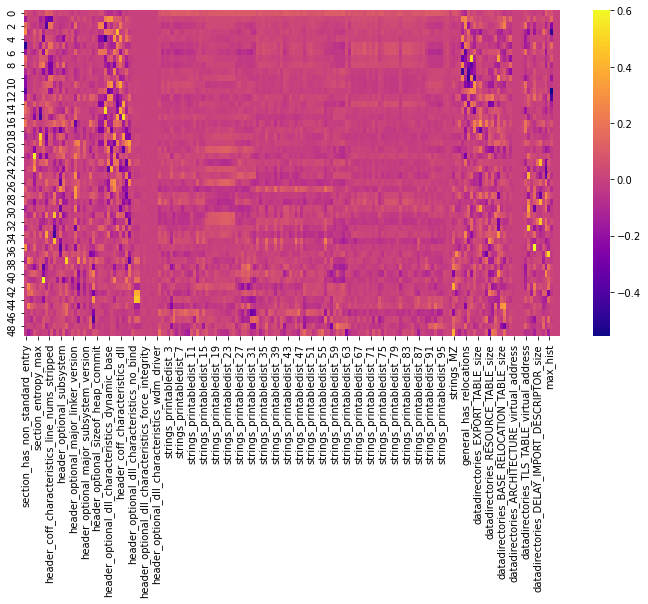

In [175]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [176]:
# create a function to build logistic regression and compare performance in train and test set

def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [177]:
run_logistic(x_pca,
             x_pca_test,
                  y_train, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train set
Logistic Regression roc-auc: 0.9304608541276747
Test set
Logistic Regression roc-auc: 0.9275838064260596


In [178]:
# create a function to build random forests and compare performance in train and test set

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [179]:
run_randomForests(x_pca,
             x_pca_test,
                  y_train, y_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Train set
Random Forests roc-auc: 0.953983507325962
Test set
Random Forests roc-auc: 0.9448611927937876
